<a href="https://colab.research.google.com/github/fabricio-franca/Data_Science/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para este projeto, escolhemos a tecnologia de Machine Learning, especificamente o algoritmo K-Nearest Neighbors (KNN), por várias razões:



*   Simplicidade e Eficiência: O KNN é um algoritmo simples e intuitivo que não faz suposições fortes sobre a distribuição dos dados. Isso é particularmente útil em cenários onde a relação entre as variáveis independentes e a variável dependente não é linear ou não é bem compreendida.
*   Capacidade de Adaptar-se a Dados Multidimensionais: O KNN pode facilmente lidar com múltiplas variáveis de entrada, permitindo que incorporemos várias características dos imóveis (como área, número de quartos, e se é mobiliado) para melhorar a precisão das previsões.
*   Flexibilidade: O KNN é um algoritmo não paramétrico, o que significa que ele pode ser aplicado a uma ampla variedade de problemas sem a necessidade de ajustar muitos parâmetros. Isso o torna uma escolha robusta para o nosso problema de previsão de aluguel, onde as características dos imóveis podem variar significativamente.
*   Facilidade de Implementação: Com bibliotecas como Scikit-learn, implementar e ajustar modelos de KNN é direto e eficiente, permitindo experimentação rápida com diferentes configurações (como o número de vizinhos, K) para otimizar o modelo.


Para construir um modelo preditivo de KNN para prever o valor do aluguel dos imóveis cadastrados na plataforma da "Sexto Andar", vamos seguir uma pipeline de Machine Learning que inclui introdução, coleta e análise de dados, pré-processamento, modelagem, validação e conclusão. Vamos usar Python e bibliotecas como Pandas, NumPy, Scikit-learn e Matplotlib para essa tarefa.


1. Introdução
O objetivo deste projeto é desenvolver um modelo de KNN para prever o valor do aluguel de imóveis com base em suas características. A métrica alvo para avaliar o modelo será o Mean Square Error (MSE).

2. Coleta e Análise de Dados
Vamos começar carregando os dados fornecidos e analisando-os para entender melhor as variáveis disponíveis.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Carregar os dados
data = pd.read_csv('/content/aluguel.csv', sep=';')

# Visualizar as primeiras linhas do dataset
print(data.head())

# Descrição estatística dos dados
print(data.describe())

# Verificar valores nulos
print(data.isnull().sum())


         cidade  area  quartos  banheiros  vagas_garagem  andar  \
0     São Paulo    70        2          1              1      7   
1     São Paulo   320        4          4              0     20   
2  Porto Alegre    80        1          1              1      6   
3  Porto Alegre    51        2          1              0      2   
4     São Paulo    25        1          1              0      1   

   aceita_animal  mobiliaria  valor_condominio  valor_aluguel  valor_iptu  \
0              1           1              2065           3300         211   
1              1           0              1200           4960        1750   
2              1           0              1000           2800           0   
3              1           0               270           1112          22   
4              0           0                 0            800          25   

   valor_seguro  valor_total  
0            42         5618  
1            63         7973  
2            41         3841  
3         

3. Pré-processamento
Vamos tratar os valores nulos (se houver), normalizar os dados e converter variáveis categóricas para numéricas.

In [17]:
# Tratar valores nulos
data = data.dropna()

# Converter variáveis categóricas para numéricas
# Nesse caso, já está tratado.

# Normalizar os dados
#Já normalizados...


4. Modelagem
Vamos desenvolver o modelo de KNN inicialmente com a variável de entrada "Área" e a variável resposta "Valor do Aluguel".

In [18]:
# Separar variáveis de entrada e resposta
X = data[['area']]
y = data['valor_aluguel']

# Dividir os dados em treino e teste usando Hold-Out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de KNN com K=5 (valor inicial)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular o EQM
mse = mean_squared_error(y_test, y_pred)
print(f'MSE com variável "Área": {mse}')


MSE com variável "Área": 6001398.986388023


5. Validação e Inclusão de Novas Variáveis

Vamos incluir as variáveis "Mobiliado" e "Números de Quartos" e verificar se o EQM melhora.

In [19]:
# Incluir variáveis adicionais
X = data[['area', 'mobiliaria', 'quartos']]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de KNN com K=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular o EQM
mse = mean_squared_error(y_test, y_pred)
print(f'MSE com variáveis "Área", "Mobiliado" e "Números de Quartos": {mse}')


MSE com variáveis "Área", "Mobiliado" e "Números de Quartos": 5829989.223144106


6. Análise do Melhor K
Vamos testar diferentes valores de K para encontrar o que retorna o menor EQM.

K=1, MSE=9524491.836244542
K=2, MSE=7196902.105505303
K=3, MSE=6405749.0590559365
K=4, MSE=5972167.087667654
K=5, MSE=5829989.223144106
K=6, MSE=5637918.743735705
K=7, MSE=5506171.044826665
K=8, MSE=5458044.518636931
K=9, MSE=5429340.204577835
K=10, MSE=5359260.158300063
K=11, MSE=5322187.332145821
K=12, MSE=5288602.374382667
K=13, MSE=5287512.6143953465
K=14, MSE=5272099.9573662905
K=15, MSE=5213992.189634712
K=16, MSE=5212420.261496997
K=17, MSE=5161684.336287714
K=18, MSE=5176465.878606278
K=19, MSE=5192984.0498528555
K=20, MSE=5164948.449727074


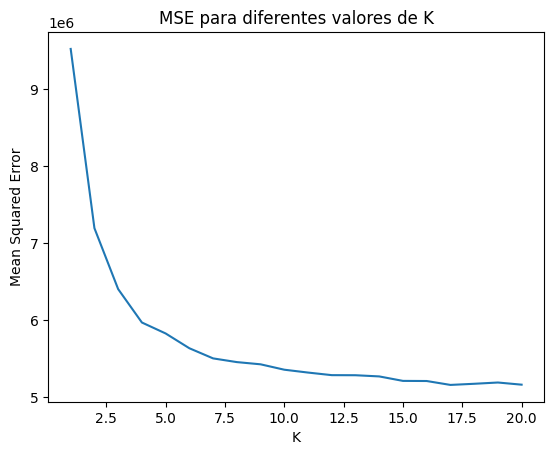

In [20]:
# Testar diferentes valores de K
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)
    print(f'K={k}, MSE={mse}')

# Plotar os resultados
plt.plot(range(1, 21), errors)
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.title('MSE para diferentes valores de K')
plt.show()


7. Conclusão
Baseado nos resultados obtidos, podemos concluir qual o melhor valor de K para o nosso modelo de KNN e quais variáveis contribuem para uma melhor previsão do valor do aluguel.

In [16]:
# Melhor valor de K
best_k = np.argmin(errors) + 1
print(f'O melhor valor de K é {best_k} com MSE={min(errors)}')


O melhor valor de K é 17 com MSE=5161684.336287714
